In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel(r"C:\Users\Anuja\Music\New folder\LungCap.xls")
df.head()

,LungCap(cc),Age( years),Height(inches),Smoke,Gender,Caesarean
0,6.475,6,62.1,no,male,no
1,10.125,18,74.7,yes,female,no
2,9.550,16,69.7,no,female,yes
3,11.125,14,71.0,no,male,no
4,4.800,5,56.9,no,male,no


In [3]:
df.shape

(725, 6)

In [4]:
df.isnull().sum()

LungCap(cc)       0
Age( years)       0
Height(inches)    0
Smoke             0
Gender            0
Caesarean         0
dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder()

In [6]:
df.Smoke=le.fit_transform(df.Smoke)

In [7]:
df.Gender=le.fit_transform(df.Gender)

In [8]:
df.Caesarean=le.fit_transform(df.Caesarean)

In [9]:
df.dtypes

LungCap(cc)       float64
Age( years)         int64
Height(inches)    float64
Smoke               int32
Gender              int32
Caesarean           int32
dtype: object

In [10]:
#1 Method
outliers=[]
def detect_outliers(var):
    threshold=2
    mean=np.mean(var)
    std=np.std(var)
    
    for i in var:
        z_score=(i-mean)/std
        if np.abs(z_score)>threshold:
            outliers.append(i)
    return outliers

In [11]:
out=detect_outliers(df['LungCap(cc)'])
out

[1.125,
 1.575,
 13.875,
 1.85,
 13.2,
 0.507,
 1.175,
 2.475,
 1.025,
 1.625,
 14.375,
 2.0,
 1.9,
 2.25,
 1.925,
 2.375,
 14.675,
 13.375,
 1.675,
 1.775,
 1.325,
 13.375,
 2.25,
 2.25,
 1.45,
 2.025,
 14.55,
 13.375,
 13.325,
 1.95]

In [12]:
def remove_outliers(df,col,k=2.5):
    mean=df[col].mean()
    global df1
    sd = df[col].std()
    final_list=[]

# Imputation

In [16]:
df["LungCap(cc)"].describe()

count    725.000000
mean       7.863148
std        2.662008
min        0.507000
25%        6.150000
50%        8.000000
75%        9.800000
max       14.675000
Name: LungCap(cc), dtype: float64

<Axes: >

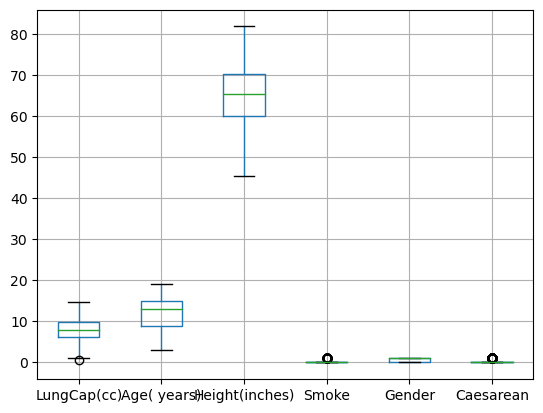

In [17]:
df.boxplot()

In [20]:
fig=plt.figure(figsize=(5,5))
sns.boxplot(data=df,y="LungCap(cc)")

<Axes: ylabel='LungCap(cc)'>

In [21]:
df["LungCap(cc)"].hist()

<Axes: ylabel='LungCap(cc)'>

In [ ]:
sns.distplot(data8.LC)

In [ ]:
impute -> 2 ways => SD,IQR

In [ ]:
SD => GD
IQR => skewed